In [ ]:
from torchvision import datasets

In [ ]:
fmnist = datasets.FashionMNIST('./data', download=True, train=True)

In [ ]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
tr_images.shape

torch.Size([60000, 28, 28])

In [ ]:
tr_targets.shape

torch.Size([60000])

In [ ]:
import matplotlib.pyplot as plt

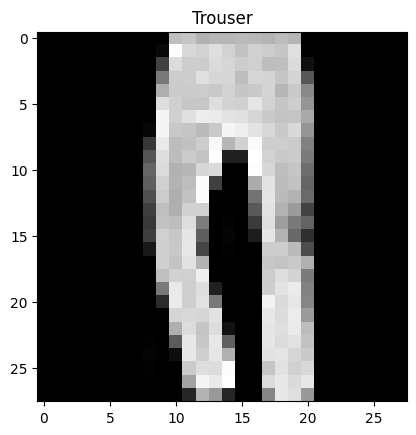

In [ ]:
ix = 24300
plt.imshow(tr_images[ix], cmap='gray')
plt.title(fmnist.classes[tr_targets[ix]]);

In [ ]:
import torch 
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

In [ ]:
model.load_state_dict(torch.load('../Chapter03/model.pth', map_location=device, weights_only=True))

<All keys matched successfully>

In [ ]:
img = tr_images[ix]/255. 
img = img.view(28*28) 
img = img.to(device)

In [ ]:
import numpy as np

In [ ]:
np_output = model(img).cpu().detach().numpy() 
probs = np.exp(np_output)/np.sum(np.exp(np_output))
probs

array([9.34475940e-03, 9.50571060e-01, 1.03680440e-03, 8.67082924e-03,
       2.99307201e-02, 3.07002011e-07, 3.40633589e-04, 2.65103859e-06,
       1.01984544e-04, 2.14303753e-07], dtype=float32)

In [ ]:
fmnist.classes[probs.argmax()]

'Trouser'

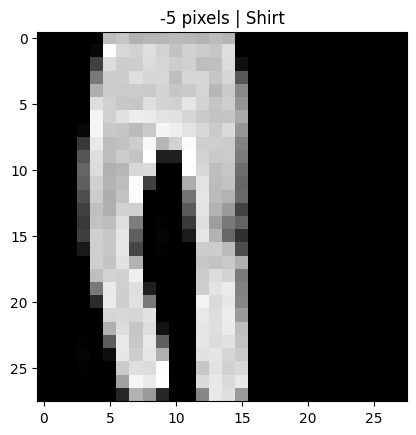

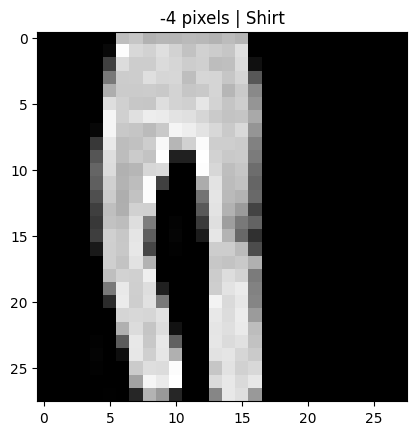

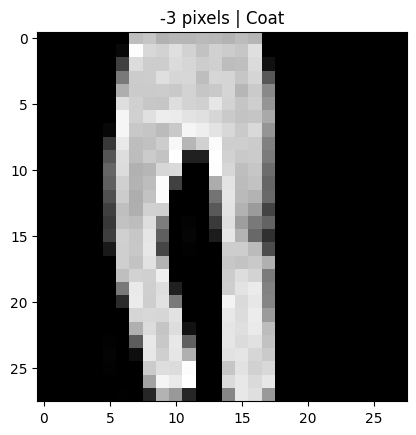

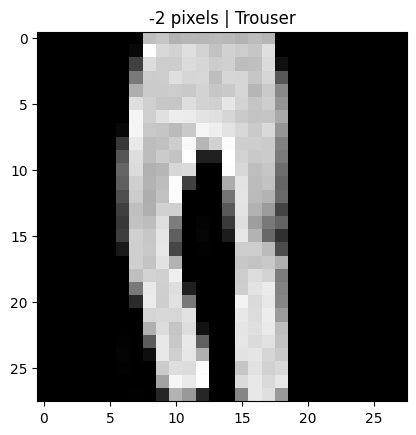

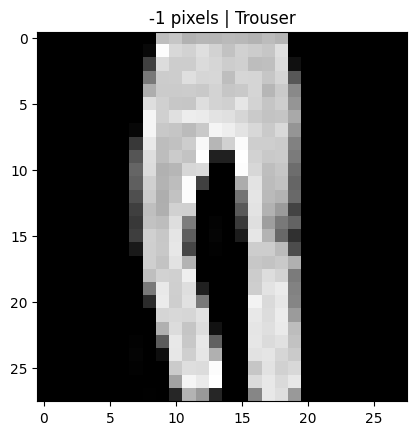

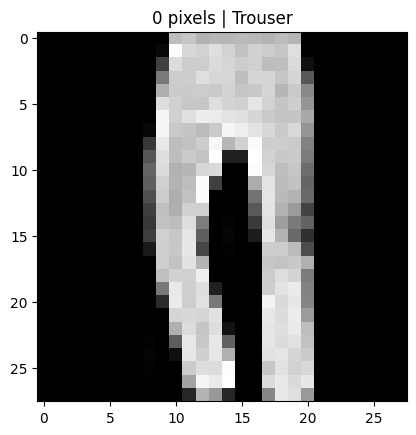

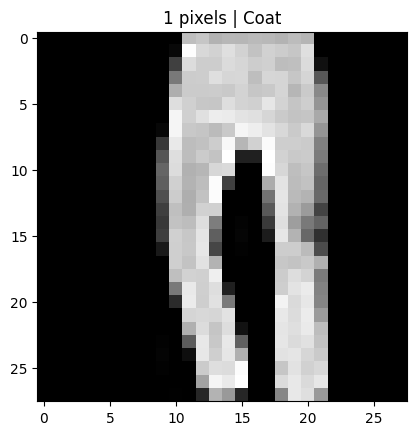

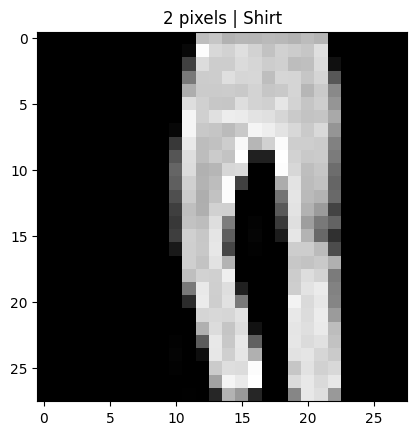

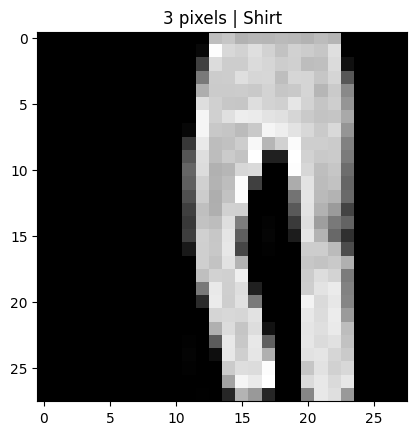

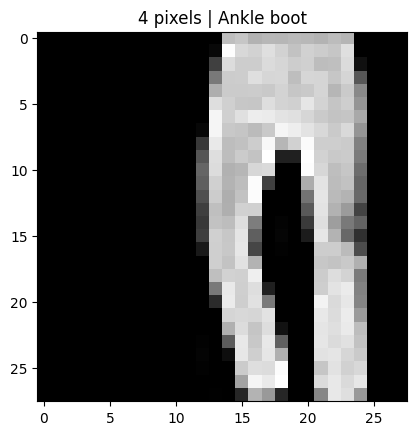

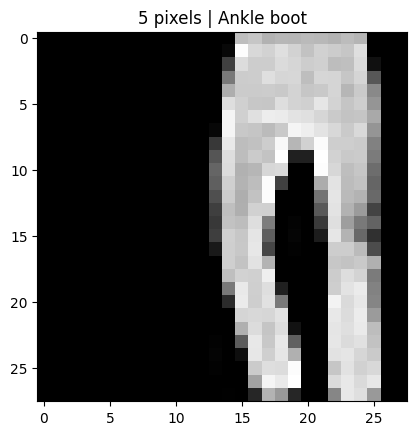

In [ ]:
preds = []
for px in range(-5,6):
  img = tr_images[ix]/255.
  img = img.view(28, 28)
  img2 = np.roll(img, px, axis=1)
  img3 = torch.Tensor(img2).view(28*28).to(device)
  np_output = model(img3).cpu().detach().numpy()
  pred = np.exp(np_output)/np.sum(np.exp(np_output))
  preds.append(pred)
  plt.imshow(img2, cmap='gray')
  plt.title(f'{px} pixels | {fmnist.classes[pred.argmax()]}')
  plt.show()

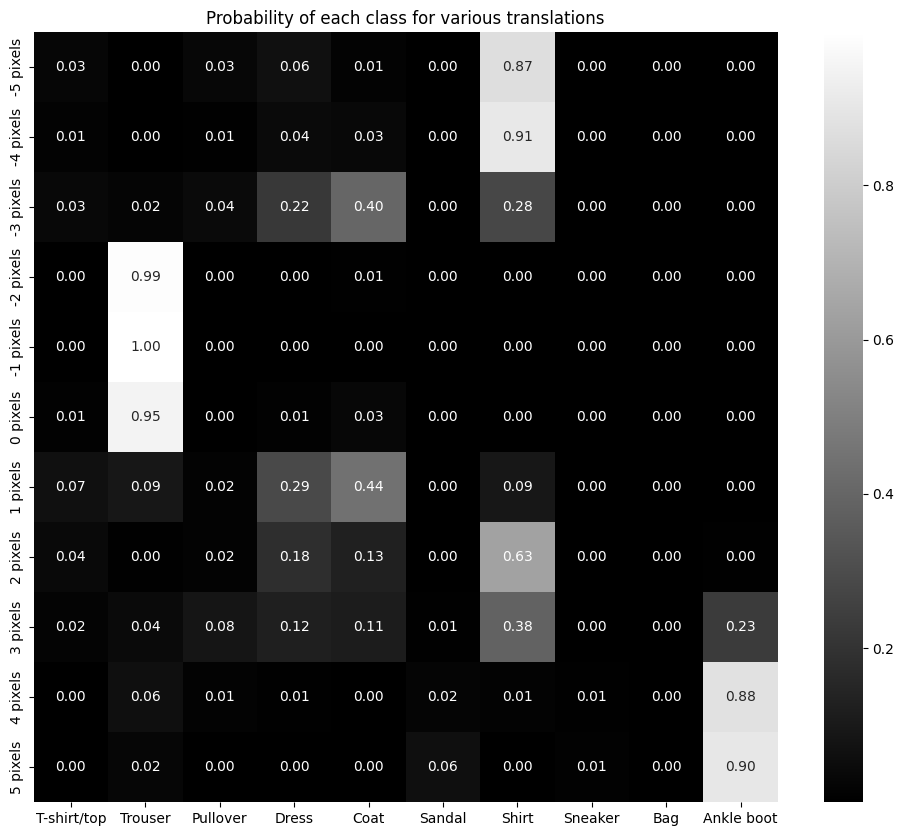

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.title('Probability of each class for various translations')
sns.heatmap(np.array(preds), annot=True, ax=ax, fmt='.2f', 
            xticklabels=fmnist.classes, 
            yticklabels=[str(i)+str(' pixels') for i in range(-5,6)], cmap='gray');